# Pandas crash course


<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/pandas/figs/pandas.png" width="300">



### Library imports

In [1]:
import pandas as pd

In [2]:
import numpy as np # Pandas and NumPy use to be together

## The Series object

In [3]:
series = pd.Series([0.25, 0.5, 0.75, 1.0])

print(series)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


In [4]:
series[1:3]

,0
1,0.50
2,0.75


In [5]:
series = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

series

,0
a,0.25
b,0.50
c,0.75
d,1.00


| Index       | Values |
|-----|-----------|
| 'a' | 0.25  |
| 'b' | 0.5   |
| 'c' | 0.75  |
| 'c' | 1  |

In [6]:
series.values

array([0.25, 0.5 , 0.75, 1.  ])

In [7]:
series.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
series[0]

<ipython-input-8-02ba0e112000>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series[0]


0.25

In [9]:
series['a']

0.25

In [10]:
series['a':'c']

,0
a,0.25
b,0.50
c,0.75


In [11]:
series[series>0.5]

,0
c,0.75
d,1.00


In [12]:
series[(series>0.5) & (series<1)]

,0
c,0.75


## The DataFrame object

Data analysis heavily relies on *dataframes*.

![Dataframe](https://pynative.com/wp-content/uploads/2021/02/dataframe.png)

(Source: https://pynative.com/python-pandas-dataframe/)

In [13]:
df = pd.DataFrame(np.random.rand(3,2), index=['a', 'b', 'c'], columns=['foo', 'bar'])

df

,foo,bar
a,0.312110,0.528633
b,0.306171,0.137631
c,0.974041,0.599213


In [14]:
df.values

array([[0.31210964, 0.52863256],
       [0.30617065, 0.13763133],
       [0.97404088, 0.59921338]])

In [15]:
df.columns

Index(['foo', 'bar'], dtype='object')

In [16]:
df.index

Index(['a', 'b', 'c'], dtype='object')

Indexing refers to columns

In [17]:
df['foo']

,foo
a,0.312110
b,0.306171
c,0.974041


Slicing refers to rows

In [18]:
df['a':'b']

,foo,bar
a,0.312110,0.528633
b,0.306171,0.137631


In [19]:
df['b':]

,foo,bar
b,0.306171,0.137631
c,0.974041,0.599213


Masking refers to rows

In [20]:
df[df['foo'] > 0.5]

,foo,bar
c,0.974041,0.599213


In [21]:
df[df['foo'] < 0.5]

,foo,bar
a,0.312110,0.528633
b,0.306171,0.137631


In [22]:
print(df)

        foo       bar
a  0.312110  0.528633
b  0.306171  0.137631
c  0.974041  0.599213


In [23]:
display(df) # Only in notebooks

,foo,bar
a,0.312110,0.528633
b,0.306171,0.137631
c,0.974041,0.599213


## Loading data

We're going to use the Titanic dataset.

In [24]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [25]:
?pd.read_csv

Reference documentation: [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [26]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Please, observe that the dataset only defines columns names.

Upload data to Colab (**It won't work anywhere else!**)

In [27]:
# It only works in Google Colab!!!

from google.colab import files
uploaded = files.upload()

# To store dataset in a Pandas Dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded['myfilename.csv']))

KeyError: 'myfilename.csv'

## Dataset summaries

In [28]:
data.shape

(891, 15)

In [29]:
data.shape[0]

891

In [30]:
data.shape[1]

15

In [31]:
len(data) # Count rows

891

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [33]:
data.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [34]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
data.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


New concept: NaN (*not a number*)

In [36]:
data['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


In [37]:
data['class'].nunique()

3

## Data selection by column

In [38]:
data["fare"]

,fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [39]:
data.fare

,fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [40]:
data[["class", "sex", "fare"]]

,class,sex,fare
0,Third,male,7.2500
1,First,female,71.2833
2,Third,female,7.9250
3,First,female,53.1000
4,Third,male,8.0500
...,...,...,...
886,Second,male,13.0000
887,First,female,30.0000
888,Third,female,23.4500
889,First,male,30.0000


## Data selection by row

In [41]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [44]:
data[data['class'] == "First"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [46]:
data[data['age'] < 30]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [47]:
data.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [48]:
data.nlargest(3, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True


In [49]:
data.nsmallest(3, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False


In [50]:
data[5, 5] # Error!

KeyError: (5, 5)

## loc, iloc and at indexers

**loc**: Explicit index (i.e., its label)

In [51]:
data.loc[:, 'age':'fare'].head() # [row, column]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [52]:
data.loc[data['age'] < 10, ['class','sex']]

,class,sex
7,Third,male
10,Third,female
16,Third,male
24,Third,female
43,Second,female
...,...,...
827,Second,male
831,Second,male
850,Third,male
852,Third,female


**iloc[]**: Implicit index (i.e., its numeric index)

In [53]:
data.iloc[3] # Row number 3; one row, so the output changes

,3
survived,1
pclass,1
sex,female
age,35.0
sibsp,1
parch,0
fare,53.1
embarked,S
class,First
who,woman


In [54]:
data.iloc[[1, 5, 10]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [55]:
data.iloc[1, 3]

38.0

In [56]:
data.iloc[:, [1,2,6]].head() # Returns columns 1, 2 and 6

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [57]:
data.iloc[5:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


*at[]* and *iat[]*: Selecting single elements from a DataFrame.

In [ ]:
data.at[1, "age"]

In [ ]:
data.iat[1, 6]

Complex queries.

In [ ]:
data[(data['age']>10) & (data['age']<15)]

In [ ]:
data.query("(age>10) and (age<15)")

## Missing data

In [ ]:
data.isna().sum()

Observe method chaining in the cell above.

In [ ]:
data['age'].isna().sum()

In [ ]:
data.notnull().sum()

Handling NaNs.

In [ ]:
display(data.head())

data.dropna().head()

In [ ]:
print(f"Rows: {len(data)}")
print(f"Rows: {len(data.dropna())}")

In [ ]:
cleanData = data.fillna("FILLED")

display(data['deck'].head())
display(cleanData['deck'].head())

In [ ]:
cleanData = data.fillna(0)

display(data['deck'].head())
display(cleanData['deck'].head())

## Making new columns

In [111]:
data['relatives'] = data['sibsp'] + data['parch']

data[data['relatives'] > 1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,2
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False,6
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,5


## Delete rows and columns

In [112]:
clean = data.drop('relatives', axis=1); # Delete column

print(data.columns)
print(clean.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'relatives'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


Pandas use to return a new dataframe or view. This behaviour can be changed with the inplace parameter, as in the following cell:

In [120]:
data.drop('relatives', axis=1, inplace=True); # Delete column in the same dataframe

print(data.columns)

KeyError: "['relatives'] not found in axis"

In [116]:
data.drop(['sibsp', 'parch'], axis=1); # Delete several columns

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [117]:
data.drop([10,12,20], axis=0) # Delete several rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Combine dataset

In [ ]:
df1 = pd.DataFrame([{'A': 'A0', 'B': 'B0'}, {'A': 'A1', 'B': 'B1'}])
df2 = pd.DataFrame([{'A': 'A2', 'B': 'B2'}, {'A': 'A3', 'B': 'B3'}])

display(df1)
display(df2)

In [ ]:
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], axis=1)

### Renaming columns and indices

In [ ]:
display(df1)

df1.index = ["row1", "row2"]

display(df1)

In [ ]:
df1.columns = ["col1", "col2"]

df1

## Group data

In [58]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
data.mean(numeric_only=True)

,0
survived,0.383838
pclass,2.308642
age,29.699118
sibsp,0.523008
parch,0.381594
fare,32.204208
adult_male,0.602694
alone,0.602694


In [61]:
data.groupby('class').mean(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/pandas/figs/03.08-split-apply-combine.png" width="500">


In [62]:
data.groupby("class").mean(numeric_only=True)['survived']

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [64]:
data.groupby("class").describe()

survived                                              pclass       ...  \
          count      mean       std  min  25%  50%  75%  max  count mean  ...   
class                                                                     ...   
First     216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  216.0  1.0  ...   
Second    184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  184.0  2.0  ...   
Third     491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0  491.0  3.0  ...   

       parch        fare                                                      \
         75%  max  count       mean        std  min       25%      50%   75%   
class                                                                          
First    0.0  4.0  216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5   
Second   1.0  3.0  184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   
Third    0.0  6.0  491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   

                  
             max  
class             
First   512.3292  
Second   73.5000  
Third    69.5500  

[3 rows x 48 columns]

In [65]:
data.groupby("class").describe().T

class                First      Second       Third
survived count  216.000000  184.000000  491.000000
         mean     0.629630    0.472826    0.242363
         std      0.484026    0.500623    0.428949
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      1.000000    0.000000    0.000000
         75%      1.000000    1.000000    0.000000
         max      1.000000    1.000000    1.000000
pclass   count  216.000000  184.000000  491.000000
         mean     1.000000    2.000000    3.000000
         std      0.000000    0.000000    0.000000
         min      1.000000    2.000000    3.000000
         25%      1.000000    2.000000    3.000000
         50%      1.000000    2.000000    3.000000
         75%      1.000000    2.000000    3.000000
         max      1.000000    2.000000    3.000000
age      count  186.000000  173.000000  355.000000
         mean    38.233441   29.877630   25.140620
         std     14.802856   14.001077   12.495398
         min      0.920000    0.670000    0.420000
         25%     27.000000   23.000000   18.000000
         50%     37.000000   29.000000   24.000000
         75%     49.000000   36.000000   32.000000
         max     80.000000   70.000000   74.000000
sibsp    count  216.000000  184.000000  491.000000
         mean     0.416667    0.402174    0.615071
         std      0.611898    0.601633    1.374883
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      1.000000    1.000000    1.000000
         max      3.000000    3.000000    8.000000
parch    count  216.000000  184.000000  491.000000
         mean     0.356481    0.380435    0.393075
         std      0.693997    0.690963    0.888861
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      0.000000    1.000000    0.000000
         max      4.000000    3.000000    6.000000
fare     count  216.000000  184.000000  491.000000
         mean    84.154687   20.662183   13.675550
         std     78.380373   13.417399   11.778142
         min      0.000000    0.000000    0.000000
         25%     30.923950   13.000000    7.750000
         50%     60.287500   14.250000    8.050000
         75%     93.500000   26.000000   15.500000
         max    512.329200   73.500000   69.550000

In [66]:
for (name, group) in data.groupby('class'):
    print("-----> " + name + " <-----")
    display(group)
    print("\n")

-----> First <-----


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True




-----> Second <-----


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True




-----> Third <-----


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


## Iterate over a dataframe

In [ ]:
for key in data.keys():
    print(key)

In [ ]:
for index, row in data.head(3).iterrows():
    print(index)
    print(row)

## Correlations

In [68]:
data.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## Plots

First we must prepare the graphical device.

In [69]:
%matplotlib inline

We are ready to plot.

<Axes: >

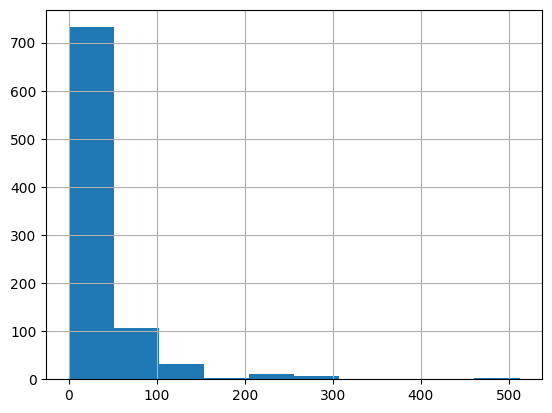

In [70]:
data['fare'].hist()

In [ ]:
data.plot.scatter(x="age", y="fare")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True)

## Exercises

Perform some basic operations on the planets (i.e., exoplanets) toy dataset.

In [85]:
import seaborn as sns

planets = sns.load_dataset('planets')

1.- Visualize your raw data.

In [93]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


2.- Identify the columns along with its datatype.

In [87]:
planets.dtypes

,0
method,object
number,int64
orbital_period,float64
mass,float64
distance,float64
year,int64


3.- Remove any column without interest.

In [98]:
planets.drop("method", axis=1)

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


4.- Obtain some summary statistics.

In [89]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


5.- Determine the number of NaNs that your dataset contains.

In [102]:
planets.isna().sum()

,0
method,0
number,0
orbital_period,43
mass,522
distance,227
year,0


6.- Remove those rows with NaNs.

In [105]:
planets.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


7.- Identify the exoplanets detection methods.

In [110]:
methods = planets['method'].unique()
methods

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

8.- Compute the number of planets detected by each method.

In [134]:
planets.groupby("method").number.count()

,number
method,
Astrometry,2
Eclipse Timing Variations,9
Imaging,38
Microlensing,23
Orbital Brightness Modulation,3
Pulsar Timing,5
Pulsation Timing Variations,1
Radial Velocity,553
Transit,397


9.- Obtain the main statistics (mean, median, standard deviation, maximum and minimum) of the explanets grouped by detection method.

In [184]:
planets.groupby("method").mass.mean()

,mass
method,
Astrometry,NaN
Eclipse Timing Variations,5.125000
Imaging,NaN
Microlensing,NaN
Orbital Brightness Modulation,NaN
Pulsar Timing,NaN
Pulsation Timing Variations,NaN
Radial Velocity,2.630699
Transit,1.470000


10.- Visualize an histogram of each variable of interest.

<Axes: xlabel='method', ylabel='mass'>

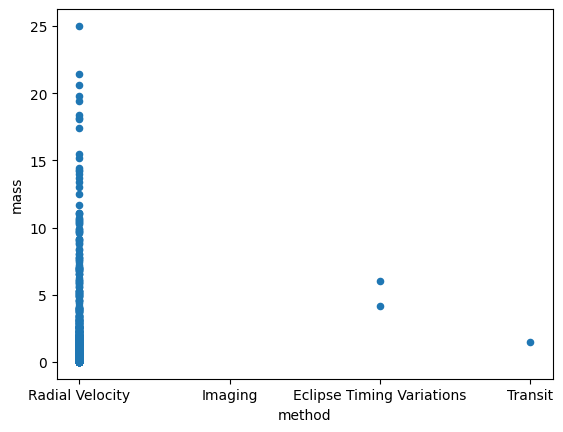

In [179]:
planets.plot.scatter(x="method", y="mass")

11.- For each detection method, visualize an histogram of any column of your interest. Do it placing one histogram in one cell, use as many cells as you need. Take a subset of your dataset in each cell. (Next week we will learn a more convenient way to do it).

<Axes: ylabel='Frequency'>

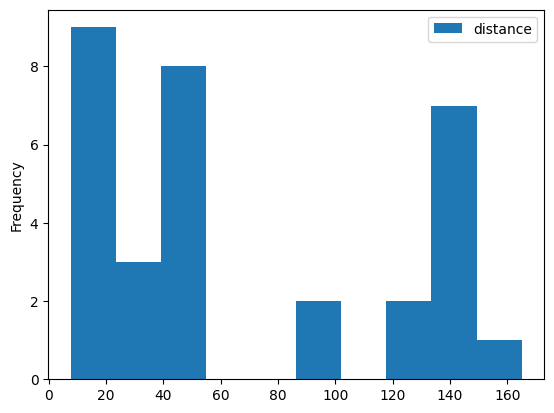

In [199]:
planets[planets['method'] == "Imaging"].plot.hist(y="distance")

<Axes: ylabel='Frequency'>

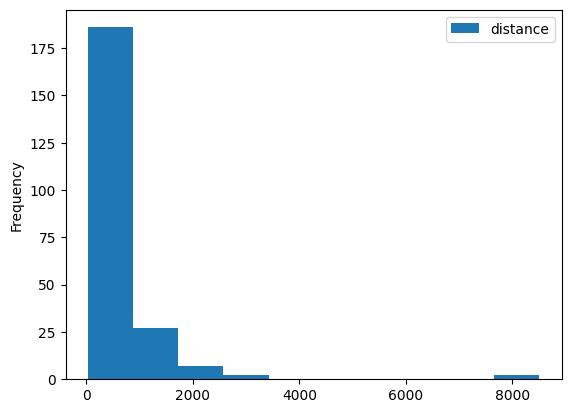

In [200]:
planets[planets['method'] == "Transit"].plot.hist(y="distance")

<Axes: ylabel='Frequency'>

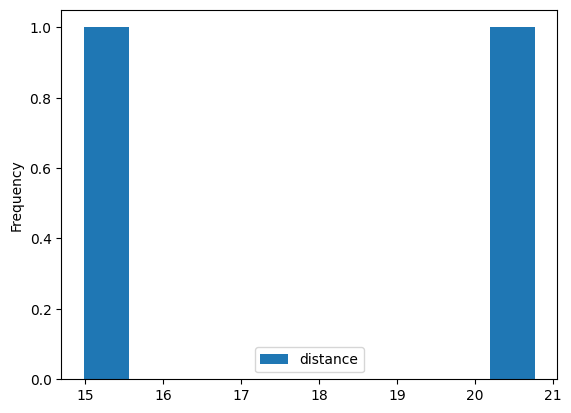

In [202]:
planets[planets['method'] == "Astrometry"].plot.hist(y="distance")

12.- Visualize an scatterplot for each pair of attributes of interest. Place each plot in a different cell, using as many cells as you need.

<Axes: xlabel='mass', ylabel='distance'>

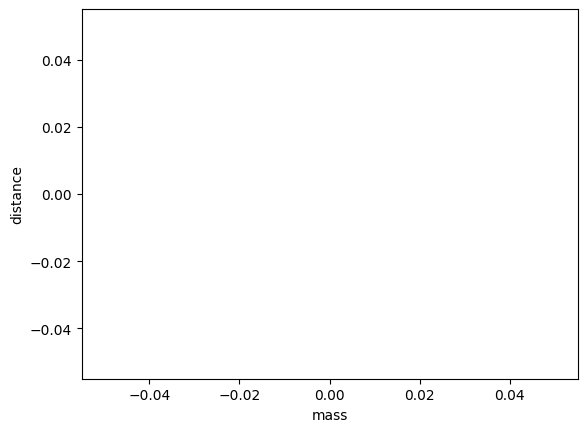

In [205]:
planets[planets['method'] == "Astrometry"].plot.scatter(x="mass", y="distance")